In [5]:
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv('laptops.csv',encoding='latin-1')

In [7]:
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


### 1. Redo the cleaning processes as presented in the data cleaning notebook

#### 1.1. Clean the column names

In [8]:
column=data.columns

In [9]:
column

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [10]:
def repair_column_name(name):
    name=name.strip()
    name=name.replace('Operating System','os')
    name=name.replace(' ','_')
    name=name.replace('(',"")
    name=name.replace(')',"")
    name=name.lower()
    return name

In [11]:
new_label=[repair_column_name(i) for i in data.columns]
new_label

['manufacturer',
 'model_name',
 'category',
 'screen_size',
 'screen',
 'cpu',
 'ram',
 'storage',
 'gpu',
 'os',
 'os_version',
 'weight',
 'price_euros']

In [12]:
data.columns=new_label
data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


#### 1.2. Convert RAM, Price, Weight into numerical columns (create new columns)

In [13]:
def convert_ram(Ram):
    Ram=int(Ram.replace('GB',''))
    return Ram

In [14]:
new_ram=[convert_ram(Ram) for Ram in data.ram]
data['ram_gb']=new_ram

In [15]:
data['price_in_euros']=data['price_euros'].str.replace(',','.').astype(float)
data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_in_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69",8,1339.69
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94",8,898.94
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00",8,575.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45",16,2537.45
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60",8,1803.60


In [16]:
data['weight_kg']=data['weight'].str.replace('kg','')
data['weight_kg']=data['weight_kg'].str.replace('s','').astype(float)
data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_in_euros,weight_kg
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69",8,1339.69,1.37
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94",8,898.94,1.34
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00",8,575.00,1.86
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45",16,2537.45,1.83
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60",8,1803.60,1.37


#### 1.3. Extract CPU speed from CPU column

In [17]:
def split_speed(s):
    s=s.split(' ')
    return float(s[-1].replace('GHz',''))

In [18]:
data['speed_ghz']=[split_speed(i) for i in data.cpu]
data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros,ram_gb,price_in_euros,weight_kg,speed_ghz
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69",8,1339.69,1.37,2.3
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94",8,898.94,1.34,1.8
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00",8,575.00,1.86,2.5
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45",16,2537.45,1.83,2.7
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60",8,1803.60,1.37,3.1


#### 1.4. Correcting values of os column

In [19]:
data.os.unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

In [20]:
data.loc[data.os=='Mac OS', 'os']='macOS'

In [21]:
data.os.unique()

array(['macOS', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

#### 1.5. Handle missing values of os_version column

In [22]:
data=data.drop('os_version',axis=1)
data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,weight,price_euros,ram_gb,price_in_euros,weight_kg,speed_ghz
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1339,69",8,1339.69,1.37,2.3
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"898,94",8,898.94,1.34,1.8
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"575,00",8,575.00,1.86,2.5
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2537,45",16,2537.45,1.83,2.7
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60",8,1803.60,1.37,3.1


### 2. Convert Screen Size column in to numeric and use that column to answer below question 

In [23]:
# convert screen size
data['screen_size_iches']=data.screen_size.str.replace('"','').astype(float)
data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,weight,price_euros,ram_gb,price_in_euros,weight_kg,speed_ghz,screen_size_iches
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1339,69",8,1339.69,1.37,2.3,13.3
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"898,94",8,898.94,1.34,1.8,13.3
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"575,00",8,575.00,1.86,2.5,15.6
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2537,45",16,2537.45,1.83,2.7,15.4
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60",8,1803.60,1.37,3.1,13.3


- What is the popular screen size ?

In [24]:
data.screen_size_iches.value_counts().head(1).index.tolist()[0]

15.6

- What is the minimum screen size of Ultrabook ?

In [25]:
min(data.loc[data['category']=='Ultrabook','screen_size_iches'])

11.6

- What is the average screen size of gaming laptop ?

In [26]:
data.category.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [27]:
data.loc[data['category']=='Gaming','screen_size_iches'].mean()

16.34585365853658

### 3.Extract Screen Resolution (for example 2880x1800), and answer



In [28]:
data.screen.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [29]:
data['screen_resolution']=data['screen'].str.extract("([0-9].*[0-9]+)")

In [30]:
data.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,weight,price_euros,ram_gb,price_in_euros,weight_kg,speed_ghz,screen_size_iches,screen_resolution
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1339,69",8,1339.69,1.37,2.3,13.3,2560x1600
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"898,94",8,898.94,1.34,1.8,13.3,1440x900
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"575,00",8,575.00,1.86,2.5,15.6,1920x1080
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2537,45",16,2537.45,1.83,2.7,15.4,2880x1800
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60",8,1803.60,1.37,3.1,13.3,2560x1600


- How many laptop has full hd (1920x1080) screen ?

In [31]:
data['screen_resolution'].value_counts()['1920x1080']

841

- What is the popular screen resolution of Macbook ?

In [32]:
data.loc[data['model_name'].str.match('MacBook'),'screen_resolution'].value_counts().index.tolist()[0]

'2560x1600'

### 4.Using column storage to create 3 new columns named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. Use this column to answer

In [33]:
data['storage_gb']=data['storage'].str.extract('([0-9]+)').astype(float)
data['storage_hdd']=1
data.loc[~data['storage'].str.match('.*HDD'),'storage_hdd']=0
data['storage_ssd']=1
data.loc[~data['storage'].str.match('.*SSD'),'storage_ssd']=0

In [34]:
data.head(10)

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,...,price_euros,ram_gb,price_in_euros,weight_kg,speed_ghz,screen_size_iches,screen_resolution,storage_gb,storage_hdd,storage_ssd
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,"1339,69",8,1339.69,1.37,2.3,13.3,2560x1600,128.0,0,1
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,"898,94",8,898.94,1.34,1.8,13.3,1440x900,128.0,0,0
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,...,"575,00",8,575.00,1.86,2.5,15.6,1920x1080,256.0,0,1
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,...,"2537,45",16,2537.45,1.83,2.7,15.4,2880x1800,512.0,0,1
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,"1803,60",8,1803.60,1.37,3.1,13.3,2560x1600,256.0,0,1
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,...,"400,00",4,400.00,2.10,3.0,15.6,1366x768,500.0,1,0
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,macOS,...,"2139,97",16,2139.97,2.04,2.2,15.4,2880x1800,256.0,0,0
7,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,...,"1158,70",8,1158.70,1.34,1.8,13.3,1440x900,256.0,0,0
8,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,...,"1495,00",16,1495.00,1.30,1.8,14.0,1920x1080,512.0,0,1
9,Acer,Swift 3,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,...,"770,00",8,770.00,1.60,1.6,14.0,1920x1080,256.0,0,1


- How many laptop have ssd storage ? How many laptop have hdd storage ?

In [35]:
data.storage_ssd.sum(),data.storage_hdd.sum()

(843, 576)

- On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

In [36]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [8, 6]

In [37]:
#ssd=data.loc[data['storage_ssd']==1,'manufacturer'].value_counts()
#hdd=data.loc[data['storage_hdd']==1,'manufacturer'].value_counts()

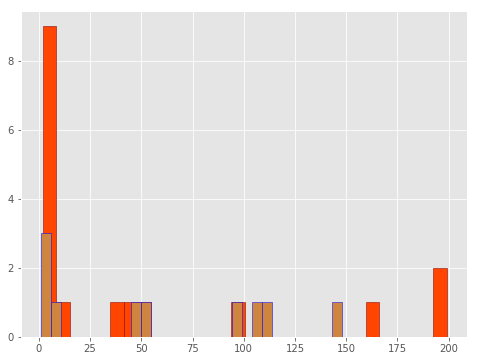

In [71]:
plt.hist(data.loc[data['storage_ssd']==1,'manufacturer'].value_counts(), 
         facecolor='orangered', 
         edgecolor='maroon', 
         bins=30)

plt.hist(data.loc[data['storage_hdd']==1,'manufacturer'].value_counts(), 
         facecolor='peru', 
         edgecolor='blue', 
         bins=30, 
         alpha = 1)

plt.show()